<a href="https://colab.research.google.com/github/naufalmnph/mini-project/blob/main/3333210109_M_Naufal_Putra_Hadi_kelas_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

In [ ]:
https://drive.google.com/file/d/1bdeypgdzwG0yMZGRcwiMxx8PXEl6kqfF/view?usp=sharing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [2]:
!gdown --id 1bdeypgdzwG0yMZGRcwiMxx8PXEl6kqfF

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bdeypgdzwG0yMZGRcwiMxx8PXEl6kqfF
To: /content/Practice2.ipynb
100% 2.01M/2.01M [00:00<00:00, 153MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/analitika/nba2k-full.csv')
dataset

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,#3,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,#3,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,#27,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,#7,Toronto Raptors,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21


## 2. Exploratory Data

In [7]:
dataset.shape

(464, 15)

In [8]:
dataset.columns

Index(['full_name', 'rating', 'jersey', 'team', 'position', 'b_day', 'height',
       'weight', 'salary', 'country', 'draft_year', 'draft_round',
       'draft_peak', 'college', 'version'],
      dtype='object')

In [9]:
dataset.dtypes

full_name      object
rating          int64
jersey         object
team           object
position       object
b_day          object
height         object
weight         object
salary         object
country        object
draft_year      int64
draft_round    object
draft_peak     object
college        object
version        object
dtype: object

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [11]:
dataset.nunique()

full_name      429
rating          31
jersey          52
team            30
position         7
b_day          415
height          20
weight          84
salary         336
country         39
draft_year      18
draft_round      3
draft_peak      57
college        109
version          3
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [13]:
dataset.isnull().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        76
version         0
dtype: int64

In [15]:
dataset['college'].dtypes

dtype('O')

In [16]:
dataset['team'].dtypes

dtype('O')

In [17]:
dataset['rating'].dtypes

dtype('int64')

In [18]:
dataset['draft_peak'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Using drop column tohandle missing value on categorical or object data

In [23]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

full_name      0
rating         0
jersey         0
position       0
b_day          0
height         0
weight         0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
version        0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [24]:
dataset.describe()

,rating,draft_year
count,464.000000,464.000000
mean,77.568966,2013.892241
std,6.933780,3.997465
min,67.000000,2001.000000
25%,73.000000,2011.000000
50%,76.000000,2015.000000
75%,80.000000,2017.000000
max,97.000000,2019.000000


<Axes: >

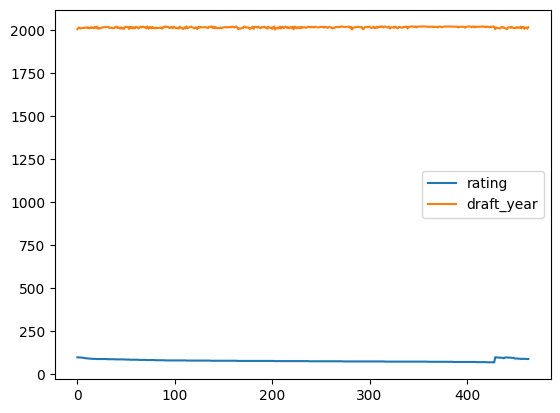

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

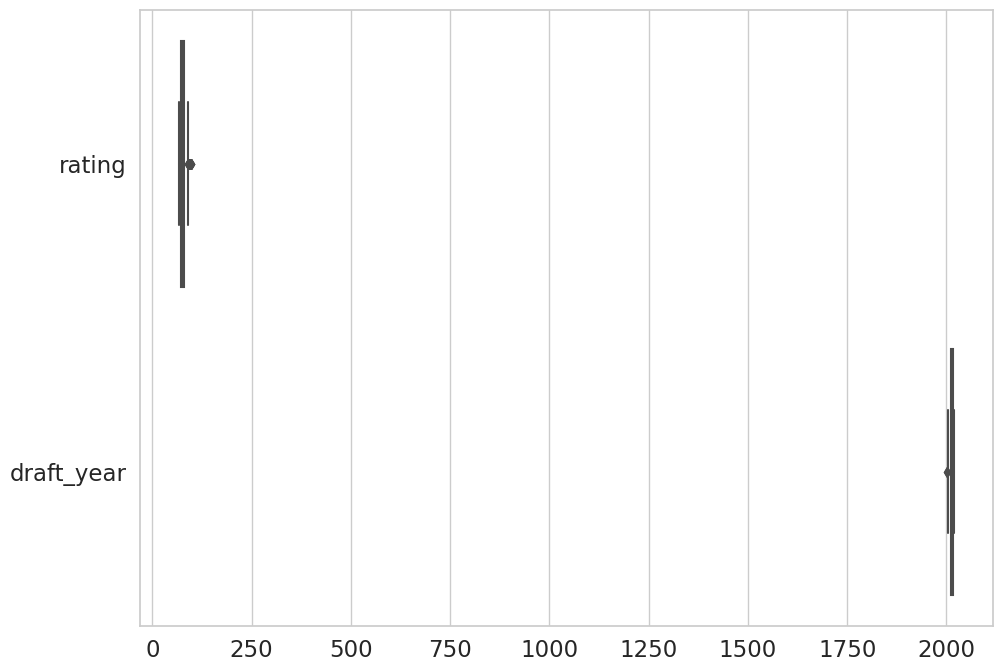

In [26]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

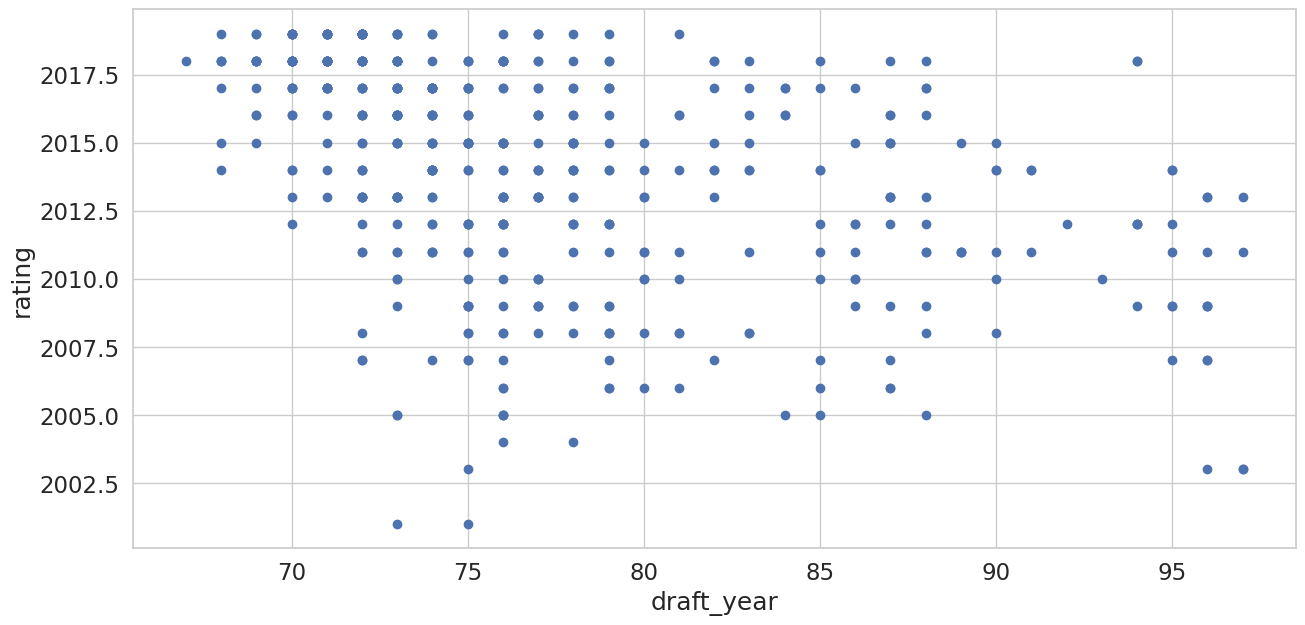

In [27]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['rating'], dataset['draft_year'])
 
# x-axis label
ax.set_xlabel('draft_year')
 
# y-axis label
ax.set_ylabel('rating')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [28]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['rating'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['rating'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (464, 13)


In [29]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['rating'] > upper].index
outliers_lower = dataset[dataset['rating'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (433, 13)


<ipython-input-29-9bec8d6c49e5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


In [30]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['draft_year'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['draft_year'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (433, 13)


In [34]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['draft_year'] > upper].index
outliers_lower = dataset[dataset['draft_year'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (428, 13)


<ipython-input-34-27470d178533>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


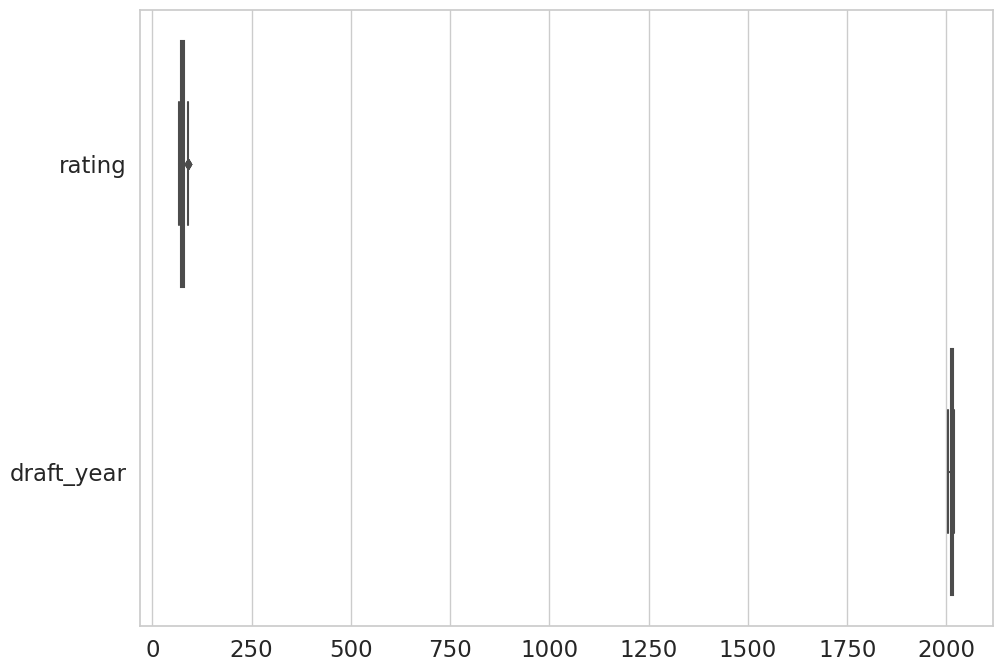

In [35]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

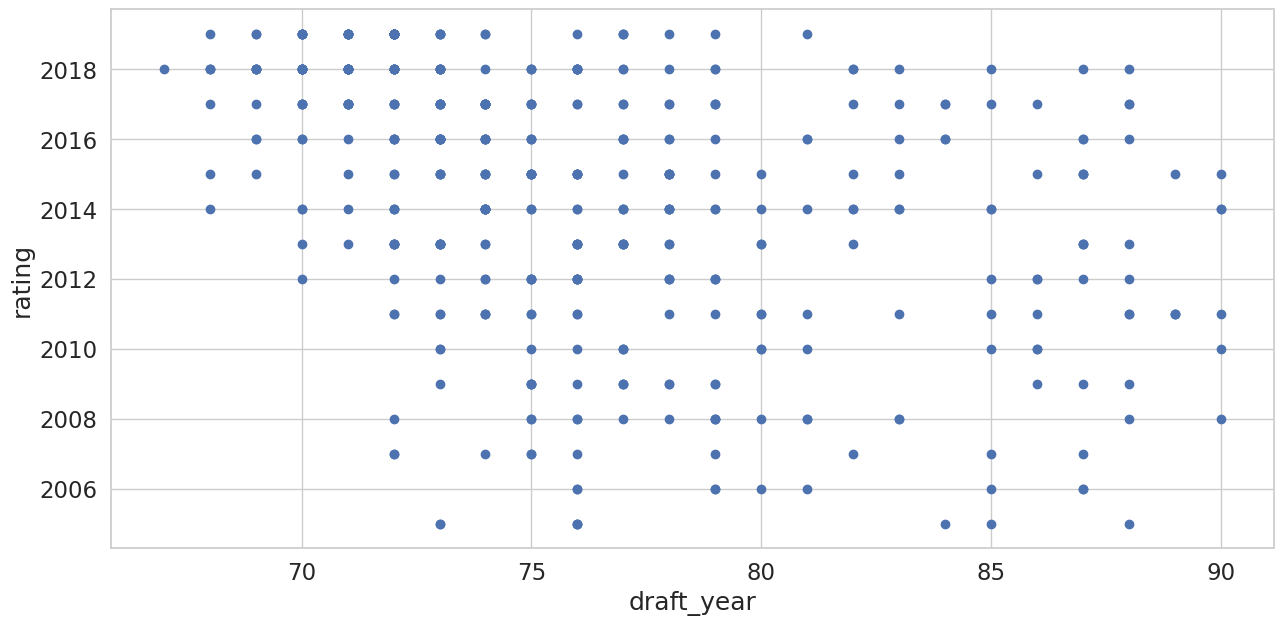

In [36]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['rating'], dataset['draft_year'])
 
# x-axis label
ax.set_xlabel('draft_year')
 
# y-axis label
ax.set_ylabel('rating')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

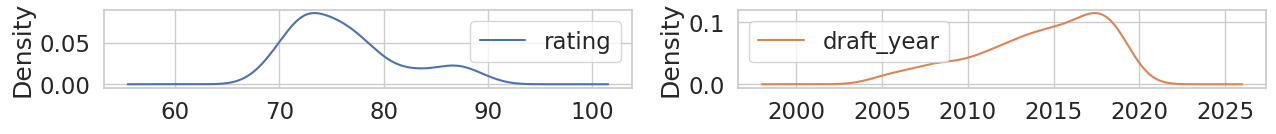

In [37]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

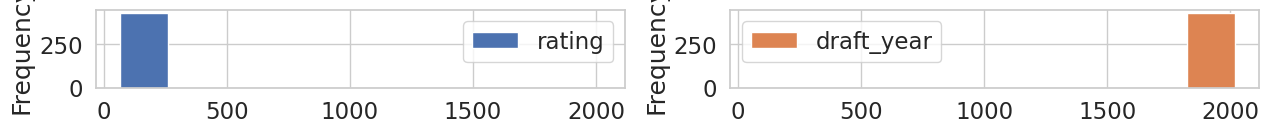

In [39]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

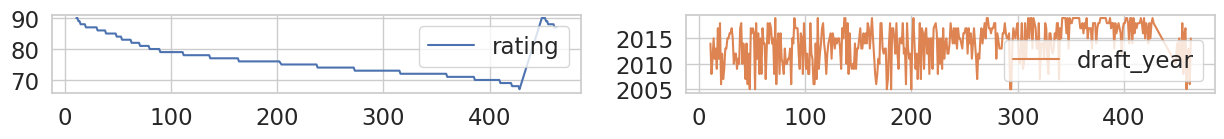

In [38]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

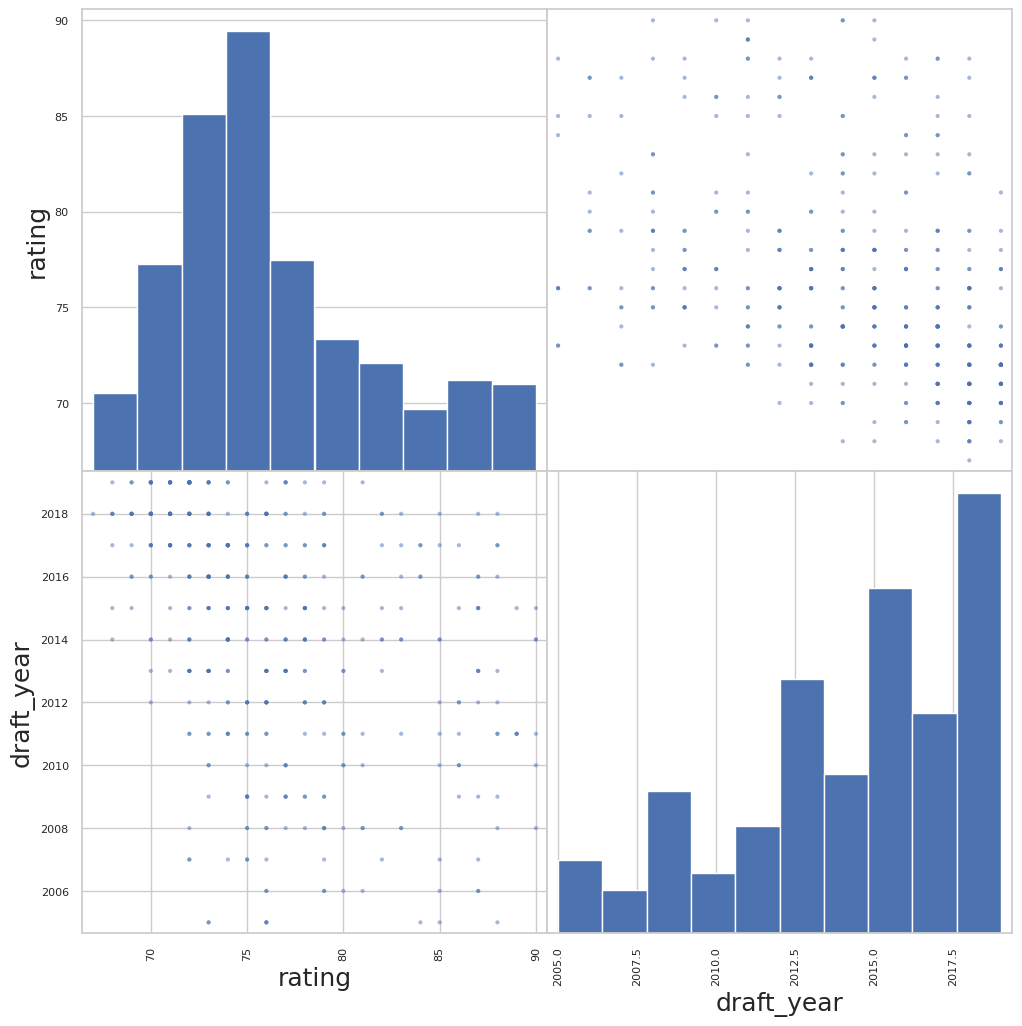

In [40]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-41-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


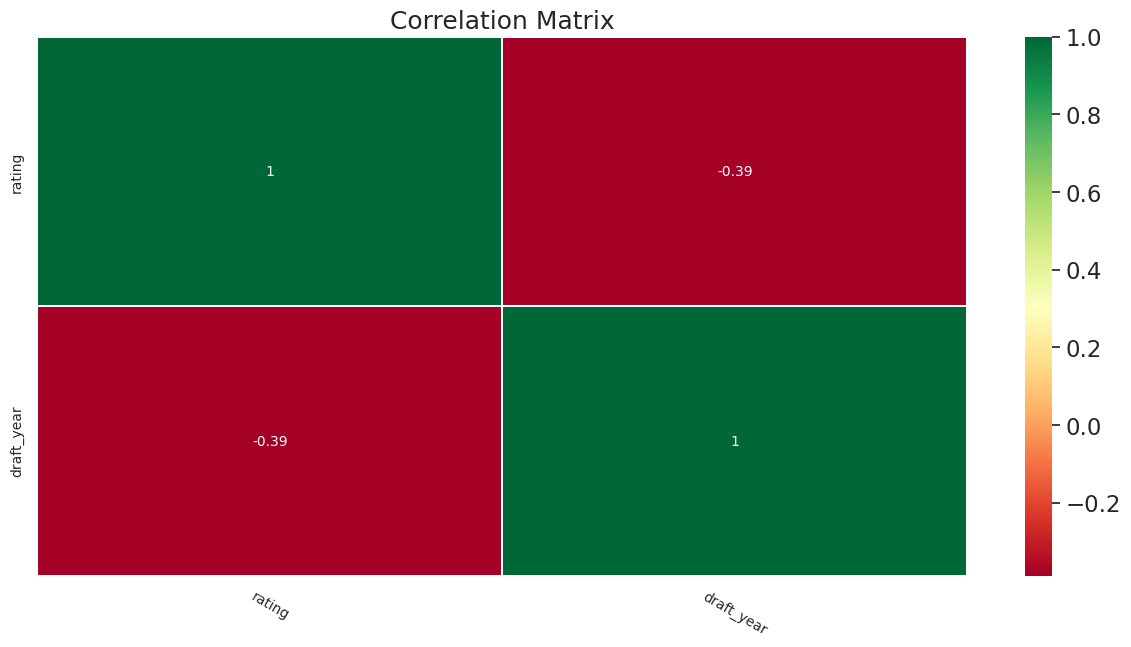

In [41]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [45]:
x = dataset.drop('draft_round', axis=1)
x

,full_name,rating,jersey,position,b_day,height,weight,salary,country,draft_year,draft_peak,version
11,Nikola Jokic,90,#15,C,02/19/95,7-0 / 2.13,253 lbs. / 114.8 kg.,$27504630,Serbia,2014,41,NBA2k20
12,Russell Westbrook,90,#0,G,11/12/88,6-3 / 1.91,190 lbs. / 86.2 kg.,$38506482,USA,2008,4,NBA2k20
13,Klay Thompson,89,#11,G,02/08/90,6-6 / 1.98,205 lbs. / 93 kg.,$32742000,USA,2011,11,NBA2k20
14,Karl-Anthony Towns,89,#32,F-C,11/15/95,6-11 / 2.11,248 lbs. / 112.5 kg.,$27285000,USA,2015,1,NBA2k20
15,Jimmy Butler,88,#22,G,09/14/89,6-7 / 2.01,220 lbs. / 99.8 kg.,$32742000,USA,2011,30,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,#3,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,4,NBA2k21
460,Bradley Beal,88,#3,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,3,NBA2k21
461,Rudy Gobert,87,#27,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,2013,27,NBA2k21
462,Kyle Lowry,87,#7,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,2006,24,NBA2k21


Choose feature Type as a label

In [46]:
y = dataset["draft_round"]
y

11     2
12     1
13     1
14     1
15     1
      ..
459    1
460    1
461    1
462    1
463    1
Name: draft_round, Length: 428, dtype: object

In [47]:
y.values.reshape(-1,1)

array([['2'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['2'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['2'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['2'],
       ['1'],
       ['2'],
       ['2'],
       ['1'],
       ['2'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['2'],
       ['1'],
       ['1'],
       ['2'],
       ['1'],
       ['2'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['2'],
       ['1'],
       ['1'],
       ['2'],
       ['1'],
       ['Undrafted']

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [48]:
x = pd.get_dummies(x)
x

,rating,draft_year,full_name_Aaron Gordon,full_name_Aaron Holiday,full_name_Abdel Nader,full_name_Admiral Schofield,full_name_Al Horford,full_name_Al-Farouq Aminu,full_name_Alec Burks,full_name_Alen Smailagic,...,draft_peak_55,draft_peak_58,draft_peak_6,draft_peak_60,draft_peak_7,draft_peak_8,draft_peak_9,draft_peak_Undrafted,version_NBA2k20,version_NBA2k21
11,90,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12,90,2008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13,89,2011,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,89,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15,88,2011,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,88,2005,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
460,88,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
461,87,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
462,87,2006,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
x.shape

(428, 1389)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [50]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388
0,2.549028,-0.070192,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,0.190577,-0.190577
1,2.549028,-1.679586,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,0.190577,-0.190577
2,2.362343,-0.874889,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,0.190577,-0.190577
3,2.362343,0.198041,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,0.190577,-0.190577
4,2.175659,-0.874889,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,0.190577,-0.190577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2.175659,-2.484283,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,-5.247221,5.247221
424,2.175659,-0.606656,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,-5.247221,5.247221
425,1.988975,-0.338424,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,-5.247221,5.247221
426,1.988975,-2.216050,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,-0.048393,...,-0.068519,-0.084017,-0.138013,-0.084017,-0.154672,-0.14656,-0.169842,-0.430808,-5.247221,5.247221


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [51]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388
0,1.000000,0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.956522,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.956522,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.913043,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.913043,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
424,0.913043,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
425,0.869565,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426,0.869565,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**4.3 Splitting**

In [52]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [53]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'1': 205, '2': 83, 'Undrafted': 54})
Test distribution Counter({'1': 52, '2': 21, 'Undrafted': 13})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [54]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [55]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.880168 (0.055818)


In [56]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [57]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9418604651162791


[[52  0  0]
 [ 5 16  0]
 [ 0  0 13]]


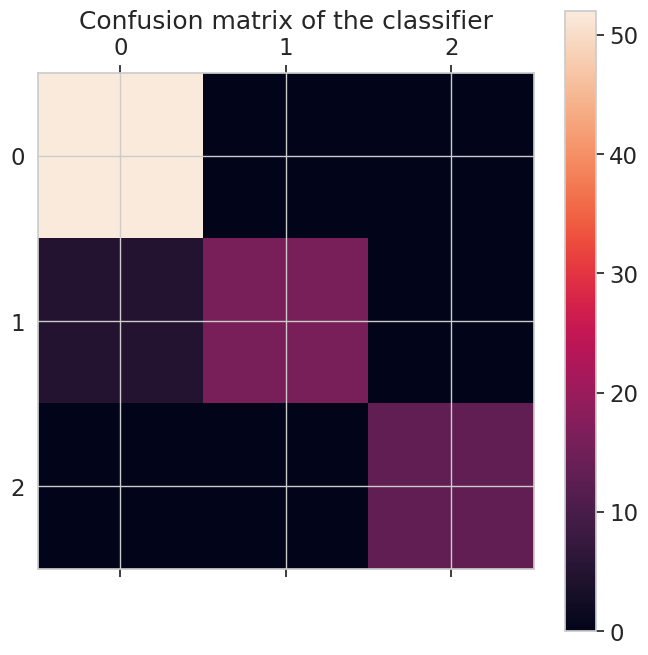

In [58]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [59]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        52
           2       1.00      0.76      0.86        21
   Undrafted       1.00      1.00      1.00        13

    accuracy                           0.94        86
   macro avg       0.97      0.92      0.94        86
weighted avg       0.95      0.94      0.94        86

